<a href="https://colab.research.google.com/github/salyamevia/natural-language-processing/blob/main/W01_BasicNLPTools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Tools in NLP
> IF4072 Natural Language Processing

**Name:** Shaffira Alya Mevia

**NIM:** 13519 083

---

Within this notebook, we are going to cover the basic tools used in natural language processing. Before that, we are going to import some common libraries and install a few mandatory add-ons.

In [58]:
# Import libraries
import string
import nltk
import re

!pip install svgling # used for graph viz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [59]:
 # NLTK Add ons
 nltk.download('punkt')
 nltk.download('wordnet')
 nltk.download('omw-1.4')
 nltk.download('stopwords')
 nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

For this task, we are going to use this example sentence taken from the Barbarian Path of Berserker and Dragonborn Traits description from the [Systems Reference Document](https://dnd.wizards.com/resources/systems-reference-document) by the Wizards of the Coast.

In [60]:
text1 = "For some barbarians, rage is a means to an end— that end being violence. The Path of the Berserker is a path of untrammeled fury, slick with blood. As you enter the berserker's rage, you thrill in the chaos of battle, heedless of your own health or well-being."
text2 = "When you use your breath weapon, each creature in the area of the exhalation must make a saving throw, the type of which is determined by your draconic ancestry. The DC for this saving throw equals 8 + your Constitution modifier + your proficiency bonus. A creature takes 2d6 damage on a failed save, and half as much damage on a successful. The damage increases to 3d6 at 6th level, 4d6 at 11th level, and 5d6 at 16th level."

For the preprocessing step, we are going to implement some from [this](https://towardsdatascience.com/text-preprocessing-in-natural-language-processing-using-python-6113ff5decd8) article, mainly the <ins>lower casing</ins> and <ins>stop words removal</ins>.

**Lower Casing** are mainly done to ensure the word `Book`, `book`, and the other capitalized variations are coded as the same word in the vector space model.

In [61]:
# Make all letters into lower case
lowered_text1 = text1.lower()
lowered_text2 = text2.lower()
lowered_text2

'when you use your breath weapon, each creature in the area of the exhalation must make a saving throw, the type of which is determined by your draconic ancestry. the dc for this saving throw equals 8 + your constitution modifier + your proficiency bonus. a creature takes 2d6 damage on a failed save, and half as much damage on a successful. the damage increases to 3d6 at 6th level, 4d6 at 11th level, and 5d6 at 16th level.'

## Sentence Splitter

**Sentence splitting** is a process of splitting free flowing text into sentences. The end of sentence (EOS) can be determined by specific delimiters, most commonly the `.` (period) symbol. Examples of other delimiters are, but not limited to, `?` (question mark) and `!` (exclamation mark).

In [62]:
# Splitting sentences within a paragraph
splitted_text1 = nltk.tokenize.sent_tokenize(lowered_text1)
splitted_text2 = nltk.tokenize.sent_tokenize(lowered_text2)
splitted_text2

['when you use your breath weapon, each creature in the area of the exhalation must make a saving throw, the type of which is determined by your draconic ancestry.',
 'the dc for this saving throw equals 8 + your constitution modifier + your proficiency bonus.',
 'a creature takes 2d6 damage on a failed save, and half as much damage on a successful.',
 'the damage increases to 3d6 at 6th level, 4d6 at 11th level, and 5d6 at 16th level.']

**Contractions** are words that are combined such as `don't`, `isn't` and so on. We need to handle or expand these contractions first before processing further.

However, since there aren't any in the example sentences, we can skip this step.

## Tokenization

**Tokenization** is a process of splitting sentences into tokens. The delimeter changes per language. For example in Indonesian and English it is simply the " " (space), however for Chinese or German it requires special techniques (the word segmentation) to split the tokens.

In [63]:
# Tokenize per word
def tokenize_list(sentences):
  temp = []
  for s in sentences:
    temp.extend(nltk.tokenize.word_tokenize(s))
    
  return temp

In [64]:
tokenized1 = tokenize_list(splitted_text1)
tokenized2 = tokenize_list(splitted_text2)
tokenized2[:10]

['when',
 'you',
 'use',
 'your',
 'breath',
 'weapon',
 ',',
 'each',
 'creature',
 'in']

**Stop Words** are words that doesn't have much context or have any significant importance by itself. Removing these words helps to reduce the dimension of the vector space.

In [65]:
# Remove stop words
stop_words = set(nltk.corpus.stopwords.words('english'))

filtered_tokenized1 = [word for word in tokenized1 if not word in stop_words]
filtered_tokenized2 = [word for word in tokenized2 if not word in stop_words]
filtered_tokenized2[:10]

['use',
 'breath',
 'weapon',
 ',',
 'creature',
 'area',
 'exhalation',
 'must',
 'make',
 'saving']

**Punctuations**, while giving context, sometimes are not needed to classify documents and paragraphs alike. Because of this, it is advised to remove them.

In [66]:
# Remove punctuations
nopunc_tokenized1 = [word for word in filtered_tokenized1 if not word in string.punctuation]
nopunc_tokenized2 = [word for word in filtered_tokenized2 if not word in string.punctuation]
nopunc_tokenized2[:10]

['use',
 'breath',
 'weapon',
 'creature',
 'area',
 'exhalation',
 'must',
 'make',
 'saving',
 'throw']

## Stemming

**Stemming** is a process of removing suffixes from words to its most basic form. This is done to standardize words for the next steps. For example, changing "likes" and "liked" into "like" and "flying" into "fli".

In [67]:
# Stemming
ps = nltk.stem.PorterStemmer()
stemmed1 = [ps.stem(word) for word in nopunc_tokenized1]
stemmed2 = [ps.stem(word) for word in nopunc_tokenized2]
stemmed2[:10]

['use',
 'breath',
 'weapon',
 'creatur',
 'area',
 'exhal',
 'must',
 'make',
 'save',
 'throw']

## Lemmanization

**Lemmanization** is a process similar to stemming, however it brings context to the word. For example, "writes", "write", "writing", and "wrote" all will change into "write".

In [68]:
# Lemmaning
wnl = nltk.stem.WordNetLemmatizer()
lemmatized1 = [wnl.lemmatize(word) for word in nopunc_tokenized1]
lemmatized2 = [wnl.lemmatize(word) for word in nopunc_tokenized2]
lemmatized2[:10]

['use',
 'breath',
 'weapon',
 'creature',
 'area',
 'exhalation',
 'must',
 'make',
 'saving',
 'throw']

## Entity Masking

**Entity Masking** is a process of "masking" or replacing entities with a mask, so that it doesn't create bias in the later process. For example, we can mask multiple email addresses into "\_email\_" so that no specific entity will be a potential bias.

In [69]:
# Masking high elves
barb = re.compile(r"(barbarian|Path of the|[Bb]erserker)")
dice = re.compile(r"(\dd\d)")
level = re.compile(r"(\d+th)")

In [70]:
def mask_text(regex, placeholder, arr):
  temp = []
  for item in arr:
    temp.append(regex.sub(placeholder, item))
  
  return temp

In [71]:
text_masked1 = mask_text(barb, '_barbarian_', lemmatized1)
text_masked2 = mask_text(dice, '_dice_', lemmatized2)
text_masked2 = mask_text(level, '_level_', text_masked2)
text_masked2[-15:]

['half',
 'much',
 'damage',
 'successful',
 'damage',
 'increase',
 '_dice_',
 '_level_',
 'level',
 '_dice_',
 '_level_',
 'level',
 '_dice_',
 '_level_',
 'level']

## POS Tagger

**POS (Part of Speech) Tagger** is a process of categorizing words in text (corpus) in correspondence with the part of speech or "word type" such as adverb, noun, verb, etc. The list of tags and its description can be found [here](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html).

In [72]:
tag1 = nltk.pos_tag(text_masked1)
tag2 = nltk.pos_tag(text_masked2)
tag2

[('use', 'NN'),
 ('breath', 'NN'),
 ('weapon', 'NN'),
 ('creature', 'NN'),
 ('area', 'NN'),
 ('exhalation', 'NN'),
 ('must', 'MD'),
 ('make', 'VB'),
 ('saving', 'VBG'),
 ('throw', 'VB'),
 ('type', 'NN'),
 ('determined', 'VBN'),
 ('draconic', 'JJ'),
 ('ancestry', 'NN'),
 ('dc', 'NN'),
 ('saving', 'VBG'),
 ('throw', 'JJ'),
 ('equal', 'JJ'),
 ('8', 'CD'),
 ('constitution', 'NN'),
 ('modifier', 'NN'),
 ('proficiency', 'NN'),
 ('bonus', 'NN'),
 ('creature', 'NN'),
 ('take', 'VB'),
 ('_dice_', 'JJ'),
 ('damage', 'NN'),
 ('failed', 'VBD'),
 ('save', 'JJ'),
 ('half', 'NN'),
 ('much', 'JJ'),
 ('damage', 'NN'),
 ('successful', 'JJ'),
 ('damage', 'NN'),
 ('increase', 'NN'),
 ('_dice_', 'NNP'),
 ('_level_', 'NNP'),
 ('level', 'NN'),
 ('_dice_', 'NNP'),
 ('_level_', 'NNP'),
 ('level', 'NN'),
 ('_dice_', 'NNP'),
 ('_level_', 'NNP'),
 ('level', 'NN')]

## Phrase Chunking

**Phrase Chunking** is a process of finding non-recursive noun phrases and verb phrases in a setence.

In [73]:
# Phrase chunking
reg_pat = nltk.chunk.regexp.tag_pattern2re_pattern('<DT>?<JJ>*<NN>')
chunk_rule = nltk.chunk.regexp.ChunkRule(reg_pat, 'a')

cp = nltk.RegexpChunkParser([chunk_rule], chunk_label='NP')

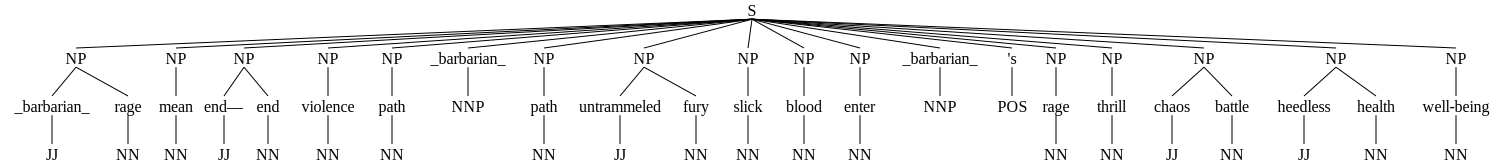

In [74]:
cs1 = cp.parse(tag1)
cs1

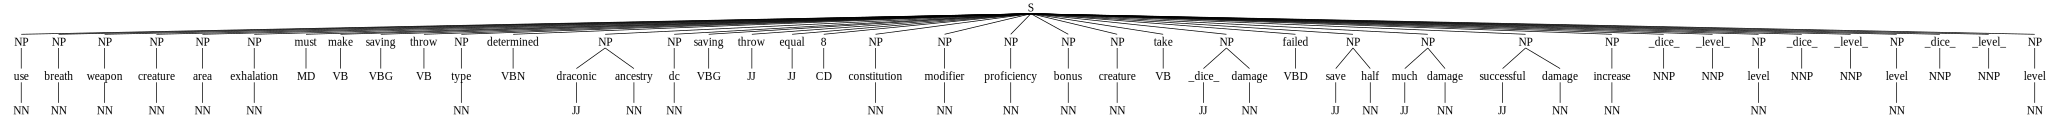

In [75]:
cs2 = cp.parse(tag2)
cs2

#### References

* [Text Preprocessing in Natural Language Processing](https://towardsdatascience.com/text-preprocessing-in-natural-language-processing-using-python-6113ff5decd8)
* [nltk.tokenize package Docs](https://www.nltk.org/api/nltk.tokenize.html)
* [What is Chunking in Natural Language Processing](https://www.analyticsvidhya.com/blog/2021/10/what-is-chunking-in-natural-language-processing/)

